<a href="https://colab.research.google.com/github/rviano96/deep-learning/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Classification (Die or not die) using Titanic dataset. Sparse features
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
#Use this to load the files from your computer to colab
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


{'test.csv': b'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\r\n893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\r\n894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\r\n895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\r\n896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\r\n897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\r\n898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\r\n899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\r\n900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\r\n901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S\r\n902,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S\r\n903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S\r\n904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.2667,B45,S\r\n905,2,"Howard, Mr. Benja

In [3]:
#Import the data from the files.
#Download the dataset from here https://www.kaggle.com/c/titanic/data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
#Show the first n rows
print(train_data.head(2))
print(test_data.head(2))

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C

[2 rows x 12 columns]
   PassengerId  Pclass                              Name  ...    Fare  Cabin  Embarked
0          892       3                  Kelly, Mr. James  ...  7.8292    NaN         Q
1          893       3  Wilkes, Mrs. James (Ellen Needs)  ...  7.0000    NaN         S

[2 rows x 11 columns]


In [4]:
def process_data(data):
  xt = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
  xt = xt.fillna(xt.mean())#Fill the NA values with the mean of the dataset

  xt.loc[:,'Sex'] = xt['Sex'].replace(['female', 'male'], [0,1]).values #Replace female by 0 and male by 1
  xt.loc[:,'Pclass'] = xt.loc[:,'Pclass']-1 #This will help us to normalize those values
  return xt

In [5]:
xt = process_data(train_data)
xtest = process_data(test_data)

In [6]:
yt = train_data['Survived']
#Hot encoding 
y_hot_encoded = tf.keras.utils.to_categorical(yt, num_classes=2)
print(y_hot_encoded)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [7]:
#Convert data to numpy array.
x_train = np.array(xt)
y_train = np.array(yt)
print(x_train.shape)
print(y_train.shape)

(891, 6)
(891,)


In [8]:
batch_size=200
epochs=200

In [9]:
inputs=tf.keras.layers.Input(shape=(6,))
x=tf.keras.layers.Dense(200)(inputs)
x=tf.keras.layers.BatchNormalization()(x) #Layer that normalizes its inputs.
#(mean close to 0 and std close to 1)
#Leaky version of a Rectified Linear Unit.
#It allows a small gradient when the unit is not active
x=tf.keras.layers.LeakyReLU(alpha=0.05)(x) #If alpha = 0.0 its a ReLU
x=tf.keras.layers.Dense(50)(x)
x=tf.keras.layers.BatchNormalization()(x) 
x=tf.keras.layers.LeakyReLU(alpha=0.05)(x) 
x=tf.keras.layers.Dense(1)(x)
x=tf.keras.layers.Activation('sigmoid')(x) #Applies an activation function to an output.

model = tf.keras.models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 200)               1400      
                                                                 
 batch_normalization (BatchN  (None, 200)              800       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                10050     
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                             

In [10]:
save_cb = tf.keras.callbacks.ModelCheckpoint('titanic.h5', monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, model='auto', save_freq=1)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.9)#SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
#Binary crossentropy because it is a binary classification
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])

In [19]:
#the history get the history of the training
#20% of the training data will be used for validate the training
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=0,validation_split=0.2, callbacks=[save_cb])

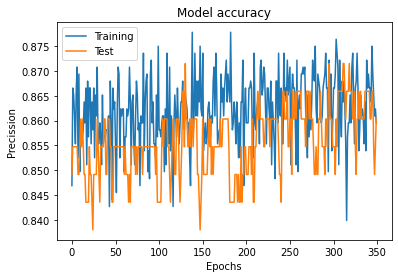

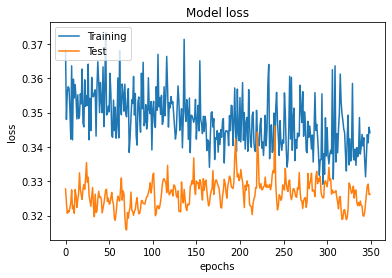

In [20]:
#plot the history
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Precission')
plt.xlabel('Epochs')
plt.legend(['Training', 'Test'], loc='upper left')


plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Training', 'Test'], loc='upper left')

plt.show()